# Life Expectancy and GDP Relationship

Import related libraries

In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Read the csv file and check the information of the dataframe

In [26]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Data Tidying

In [27]:
df.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'}, inplace=True)
df.head(17)

,Country,Year,Life Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [28]:
df.rename(columns={'GDP': 'GDP in Billion'}, inplace=True)
df

,Country,Year,Life Expectancy,GDP in Billion
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [29]:
df['GDP in Billion'] = df['GDP in Billion']/10**9
df

,Country,Year,Life Expectancy,GDP in Billion
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393
...,...,...,...,...
91,Zimbabwe,2011,54.9,12.098451
92,Zimbabwe,2012,56.6,14.242490
93,Zimbabwe,2013,58.0,15.451769
94,Zimbabwe,2014,59.2,15.891049


In [30]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life Expectancy  96 non-null     float64
 3   GDP in Billion   96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


(96, 4)

In [31]:
df.describe()

,Year,Life Expectancy,GDP in Billion
count,96.000000,96.000000,96.000000
mean,2007.500000,72.789583,3880.498571
std,4.633971,10.672882,5197.561311
min,2000.000000,44.300000,4.415703
25%,2003.750000,74.475000,173.301750
50%,2007.500000,76.750000,1280.220000
75%,2011.250000,78.900000,4067.510000
max,2015.000000,81.000000,18100.000000


In [32]:
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [33]:
df['Year'].nunique()

16

In [34]:
df['Country'].nunique()

6

In [35]:
df['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

DataFrame has data from 6 different countries ('Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe') over the years from 2000 to 2015. 

## Check Missing Data

There is no missing data so no further process for data cleaning is needed.

In [36]:
columns_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
columns_with_missing_data

[]

## Life Expectancy Over the Years for Each country

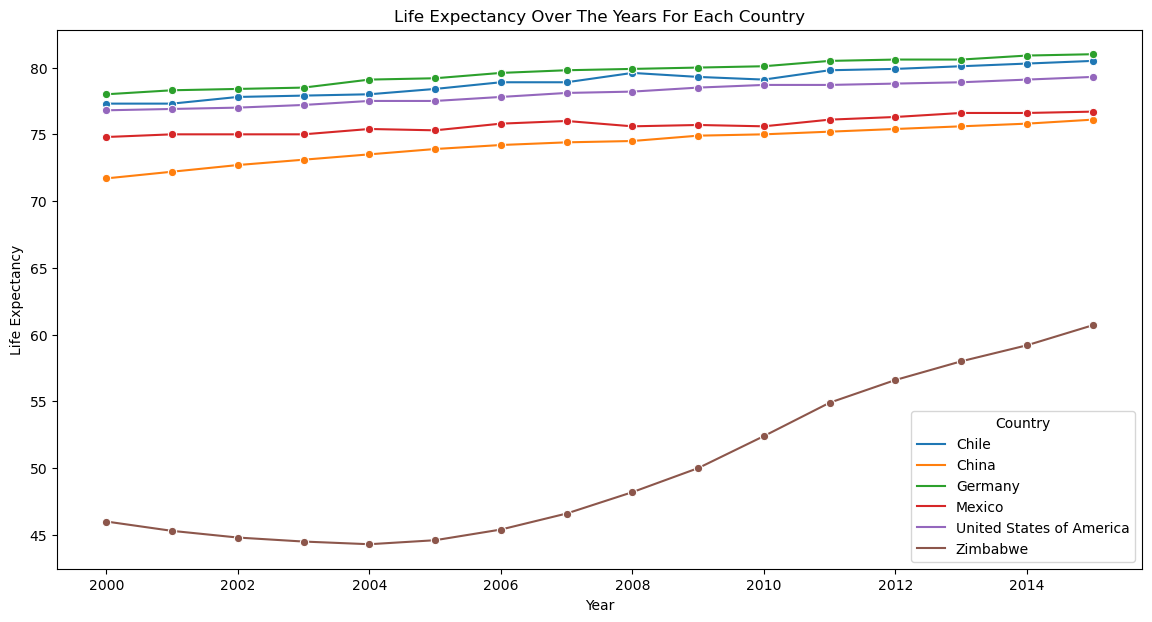

In [40]:
plt.subplots(figsize=(14, 7))
sns.lineplot(x=df['Year'], y=df['Life Expectancy'], hue=df['Country'], marker='o')
plt.title('Life Expectancy Over The Years For Each Country')
plt.show()

## GDP Over Years 

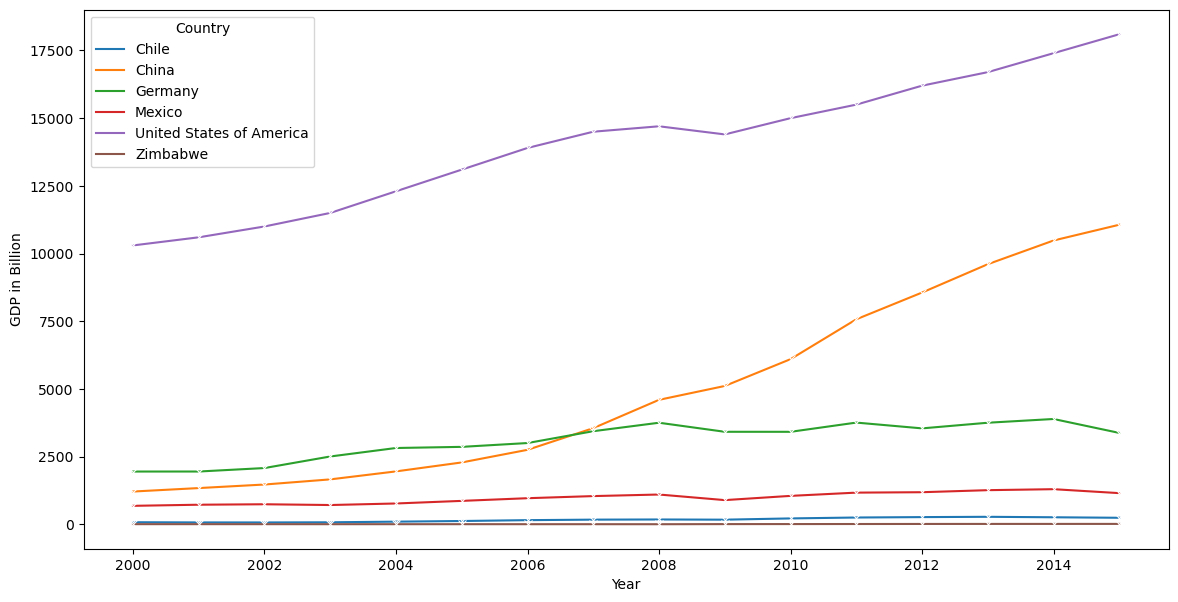

In [42]:
plt.subplots(figsize=(14, 7))
sns.lineplot(data=df, x='Year', y='GDP in Billion', hue='Country', marker='x')
plt.show()

# Life Expectancy Over GDP

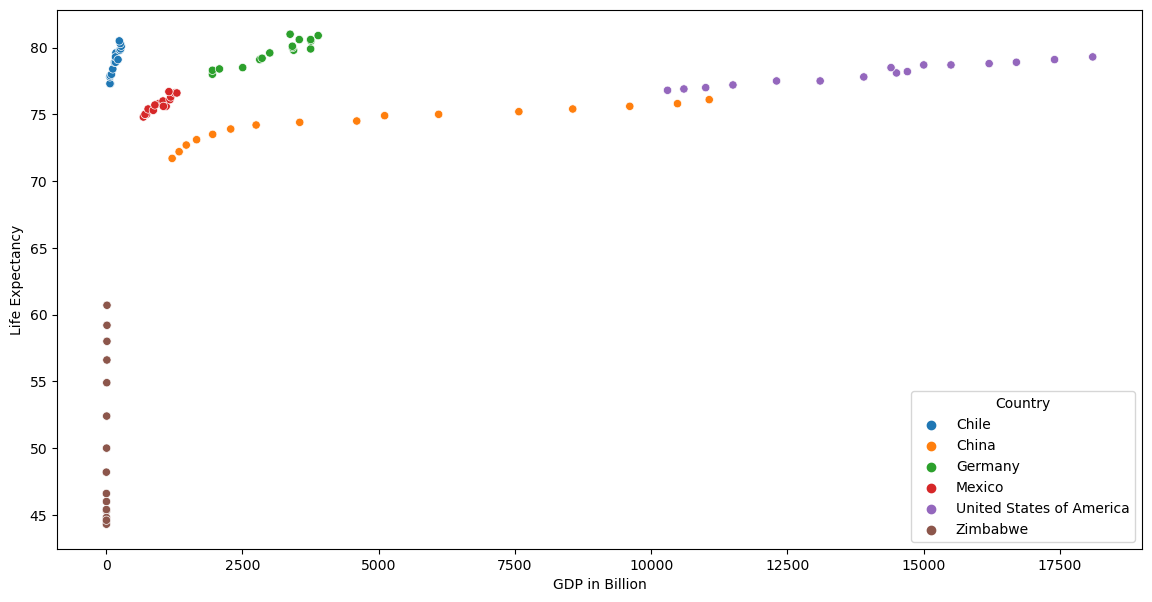

In [43]:
plt.subplots(figsize=(14,7))
sns.scatterplot(data=df, y='Life Expectancy', x='GDP in Billion', hue='Country')
plt.show()

## Life Expectancy Over the Years of Each Country

In [44]:
country_list = [c for c in df['Country'].unique()]
country_list

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

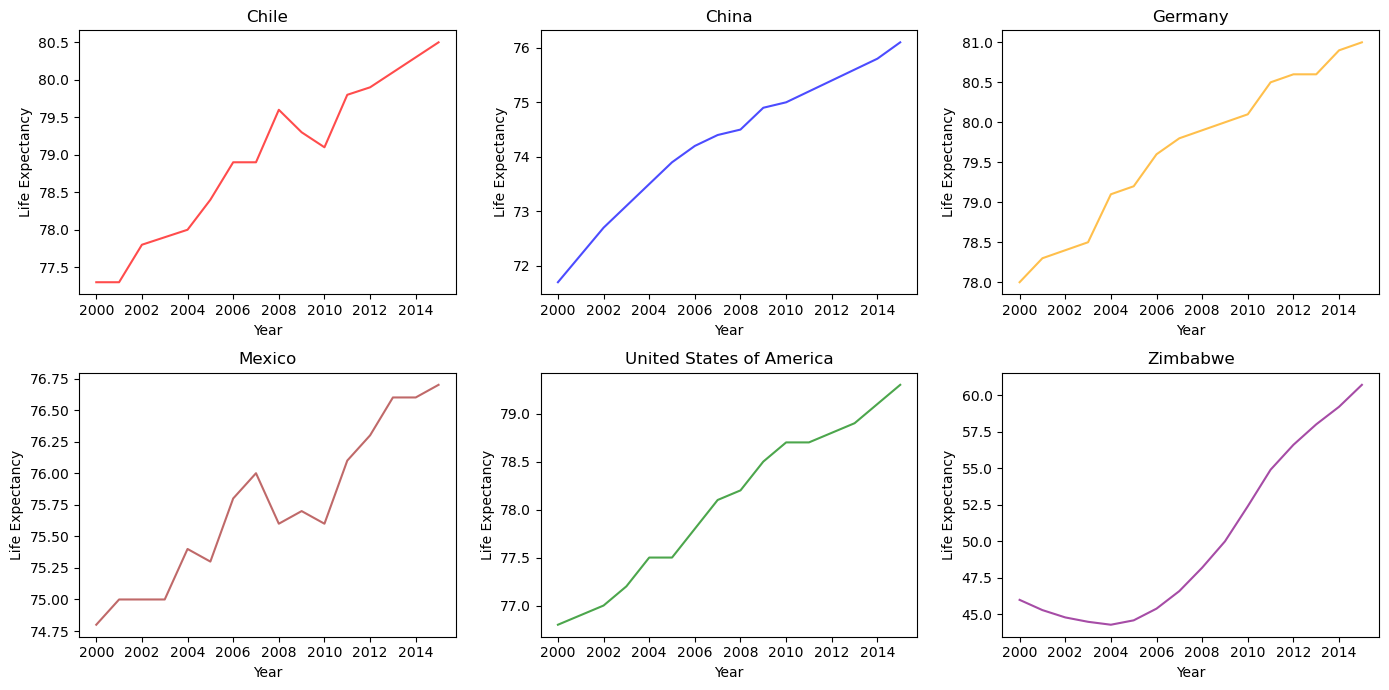

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,7))
axes = axes.flatten()

colors = ['red', 'blue', 'orange', 'brown', 'green', 'purple']

for i, country in enumerate(country_list):
    country_data = df[df['Country'] == country]
    axes[i].plot(country_data['Year'], country_data['Life Expectancy'], alpha=0.7, color=colors[i])
    
    axes[i].set_title(f"{country}")
    
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

## GDP Over the Years for Each Country

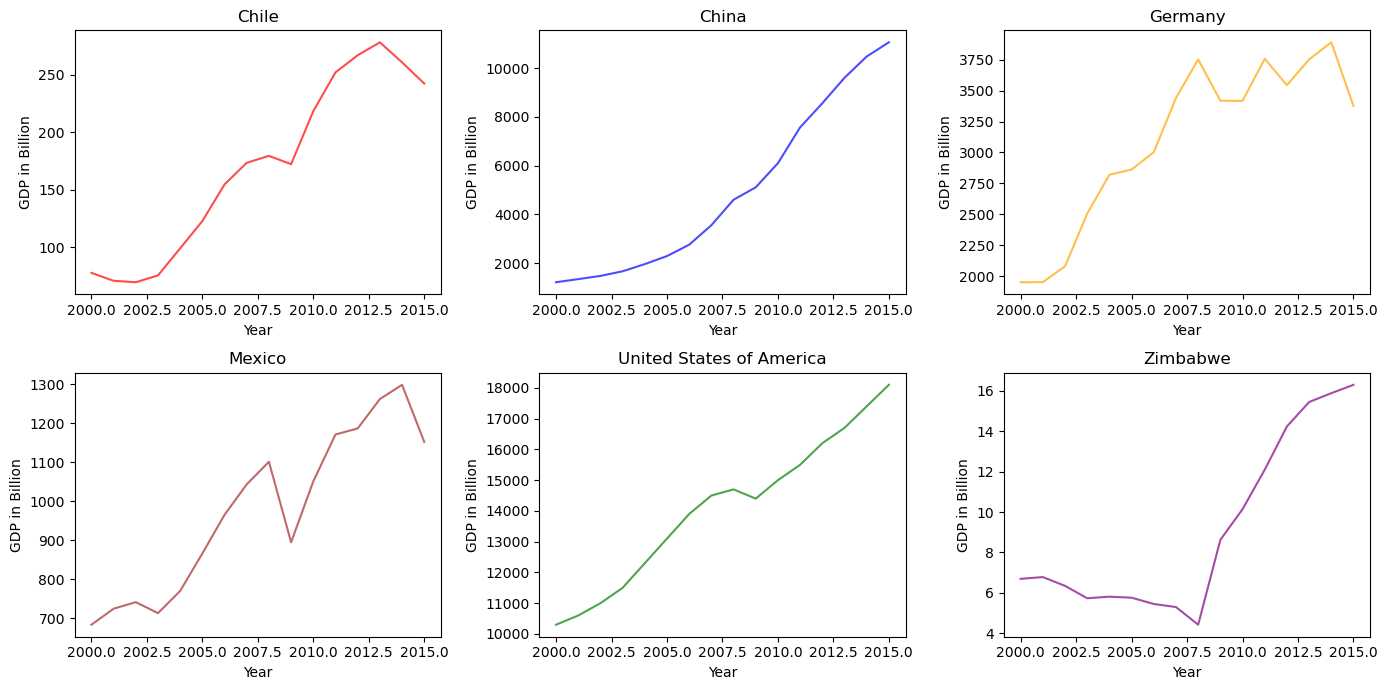

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,7))
axes = axes.flatten()

colors = ['red', 'blue', 'orange', 'brown', 'green', 'purple']

for i, country in enumerate(country_list):
    country_data = df[df['Country'] == country]
    axes[i].plot(country_data['Year'], country_data['GDP in Billion'], alpha=0.7, color=colors[i])
    
    axes[i].set_title(f"{country}")
    
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('GDP in Billion')

plt.tight_layout()
plt.show()

## GDP Over Life Expectancy For Each Country

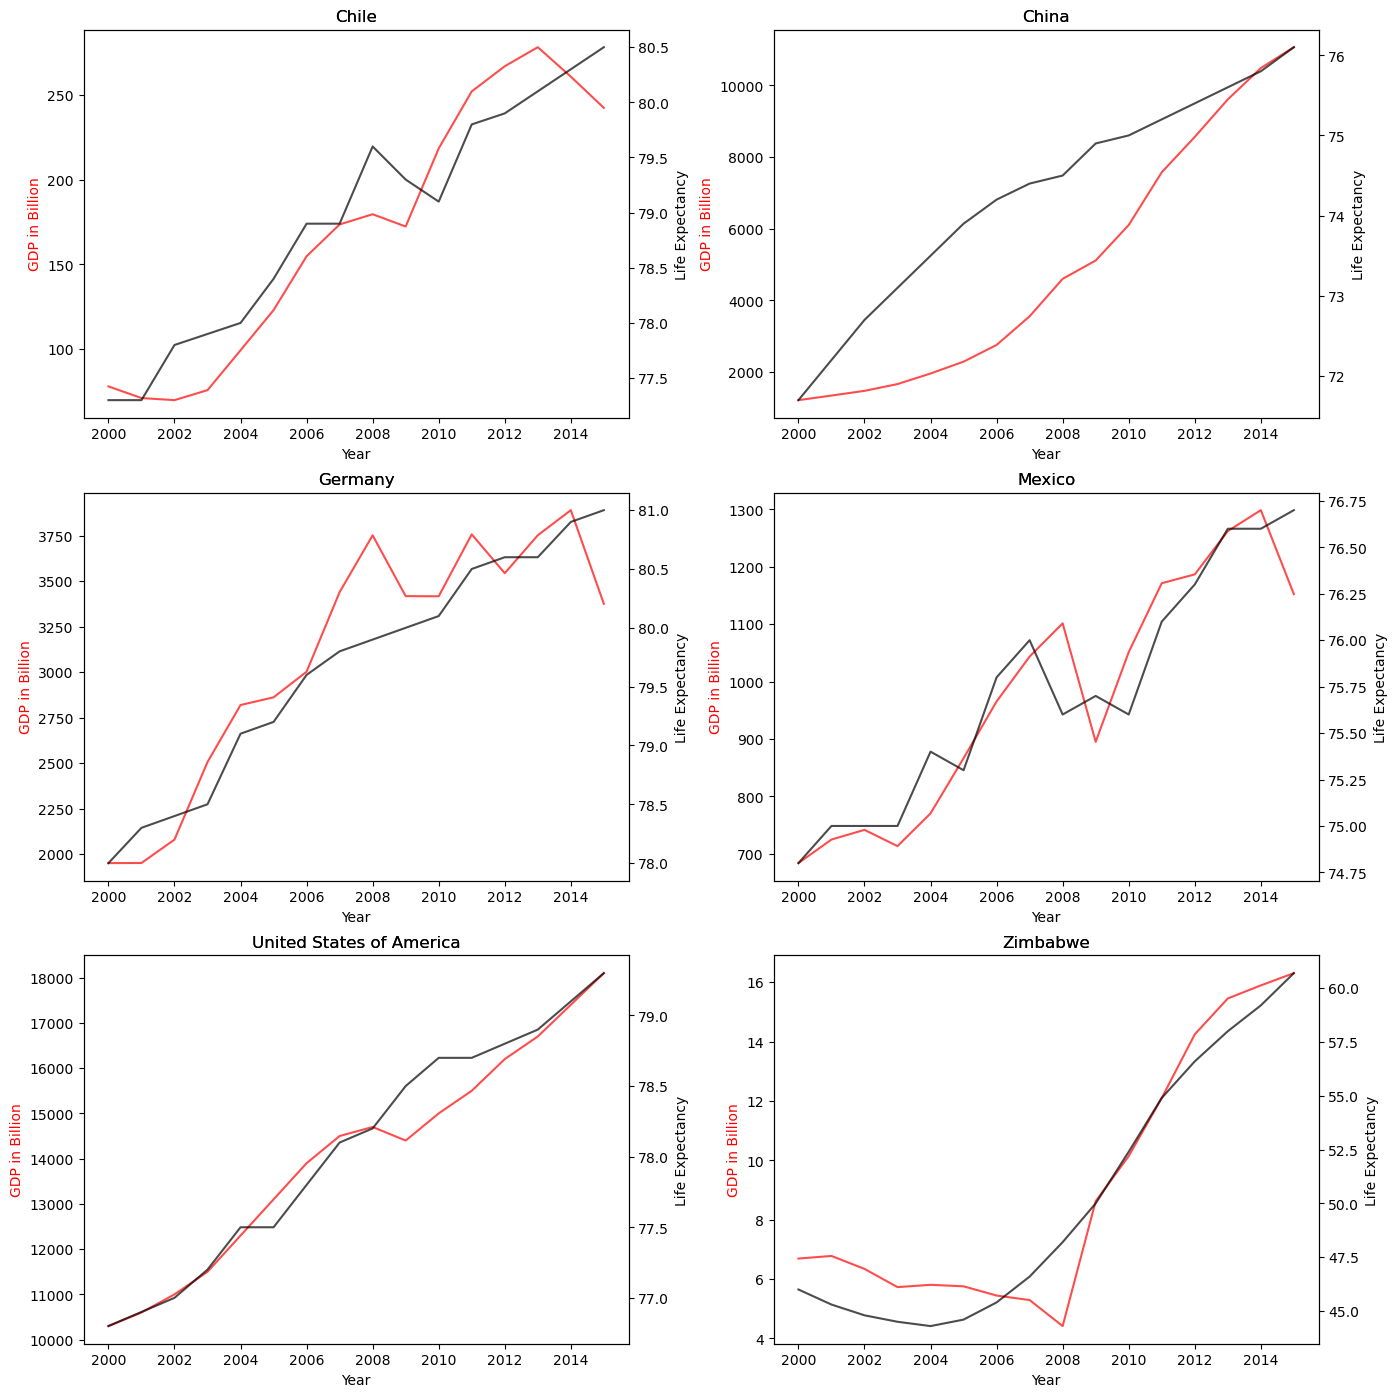

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14))
axes = axes.flatten()
 
for i, country in enumerate(country_list):
    country_data = df[df['Country'] == country]
    
    ax_gdp = axes[i]
    
    ax_gdp.plot(country_data['Year'], country_data['GDP in Billion'], alpha=0.7, color='red')
    ax_gdp.set_title(f"{country}")
    ax_gdp.set_xlabel('Year')
    ax_gdp.set_ylabel('GDP in Billion', color='red')
    
    ax_life = ax_gdp.twinx()
    
    ax_life.plot(country_data['Year'], country_data['Life Expectancy'], alpha=0.7, color='black')
    ax_life.set_title(f"{country}")
    ax_life.set_xlabel('Year')
    ax_life.set_ylabel('Life Expectancy', color='black')
    

plt.tight_layout(pad=0.8)
plt.show()